# Building a CNN from Scratch - Lab

## Introduction

Now that you have background knowledge regarding how CNNs work and how to build them using Keras, its time to practice those skills a little more independently in order to build a CNN on your own to solve a image recognition problem. In this lab, you'll practice building an image classifier from start to finish using a CNN.  

## Objectives

In this lab you will: 

- Load images from a hierarchical file structure using an image datagenerator 
- Apply data augmentation to image files before training a neural network 
- Build a CNN using Keras 
- Visualize and evaluate the performance of CNN models 

## Loading the Images

The data for this lab concerns lung xray images for pneumonia. The original dataset is from Kaggle. We have downsampled this dataset in order to reduce training time for you when you design and fit your model to the data. ⏰ It is anticipated that this process will take approximately one hour to run on a standard machine, although times will vary depending on your particular computer and set up. At the end of this lab, you are welcome to try training on the complete dataset and observe the impact on the model's overall accuracy. 

You can find the initial downsampled dataset in a subdirectory, **chest_xray**, of this repository. 

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

Using TensorFlow backend.


In [2]:
train_dir = 'chest_xray_downsampled/train'
validation_dir = 'chest_xray_downsampled/val/'
test_dir = 'chest_xray_downsampled/test/' 

# rescaling images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(        
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 1738 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


## Designing the Model

Now it's time to design your CNN using Keras! Remember a few things when doing this: 

- You should alternate convolutional and pooling layers
- You should have later layers have a larger number of parameters in order to detect more abstract patterns
- Add some final dense layers to add a classifier to the convolutional base 
- Compile this model 

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Training and Evaluating the Model

Remember that training deep networks is resource intensive: depending on the size of the data, even a CNN with 3-4 successive convolutional and pooling layers is apt to take a hours to train on a high end laptop. Using 30 epochs and 8 layers (alternating between convolutional and pooling), our model took about 40 minutes to run on a year old macbook pro.


If you are concerned with runtime, you may want to set your model to run the training epochs overnight.  

**If you are going to run this process overnight, be sure to also script code for the following questions concerning data augmentation. Check your code twice (or more) and then set the notebook to run all, or something equivalent to have them train overnight.** 

In [5]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 137s 1s/step - loss: 0.4781 - acc: 0.7888 - val_loss: 0.6501 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 124s 1s/step - loss: 0.2646 - acc: 0.8940 - val_loss: 1.1109 - val_acc: 0.7500
Epoch 3/30
100/100 [==============================] - 131s 1s/step - loss: 0.1751 - acc: 0.9279 - val_loss: 2.4420 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 133s 1s/step - loss: 0.1472 - acc: 0.9419 - val_loss: 1.0687 - val_acc: 0.7500
Epoch 5/30
100/100 [==============================] - 140s 1s/step - loss: 0.1164 - acc: 0.9545 - val_loss: 1.1732 - val_acc: 0.7500
Epoch 6/30
100/100 [==============================] - 136s 1s/step - loss: 0.1013 - acc: 0.9619 - val_loss: 2.0191 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 127s 1s/step - loss: 0.0898 - acc: 0.9684 - val_loss: 0.9115 - val_acc: 0.5000
Epoch 8/30
100/100 [==============================] - 121s 1s/step - 

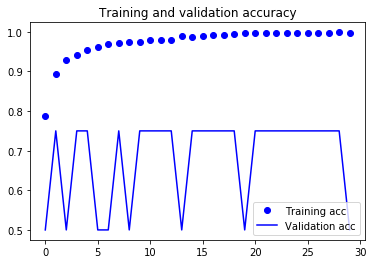

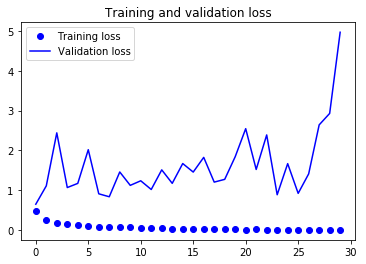

In [6]:
# Plot history
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [7]:
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Training took a total of 1:28:54.338441


## Save the Model

In [8]:
model.save('chest_xray_downsampled_data.h5')

## Data Augmentation

Recall that data augmentation is typically always a necessary step when using a small dataset as this one which you have been provided. As such, if you haven't already, implement a data augmentation setup.

**Warning: ⏰ This process took nearly 4 hours to run on a relatively new macbook pro. As such, it is recommended that you simply code the setup and compare to the solution branch, or set the process to run overnight if you do choose to actually run the code.** 

In [ ]:
start = datetime.datetime.now()

Save the model for future reference.  

In [9]:
train_datagen = ImageDataGenerator(rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(      
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=32, 
                                                        class_mode='binary')

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Found 1738 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 203s 2s/step - loss: 3.9874 - acc: 0.7501 - val_loss: 3.3393 - val_acc: 0.7500
Epoch 2/100
100/100 [==============================] - 193s 2s/step - loss: 3.6963 - acc: 0.7682 - val_loss: 3.2990 - val_acc: 0.7500
Epoch 3/100
100/100 [==============================] - 182s 2s/step - loss: 4.0270 - acc: 0.7476 - val_loss: 1.0742 - val_acc: 0.7500
Epoch 4/100
100/100 [==============================] - 179s 2s/step - loss: 4.5097 - acc: 0.7174 - val_loss: 0.6950 - val_acc: 0.7500
Epoch 5/100
100/100 [==============================] - 177s 2s/step - loss: 3.9395 - acc: 0.7529 - val_loss: 3.2092 - val_acc: 0.5000
Epoch 6/100
100/100 [==============================] - 176s 2s/step - loss: 3.8818 - acc: 0.7566 - val_loss: 7.3500 - val_acc: 0.5000
Epoch 7/100
100/100 [==============================] - 175s 2s/step - loss: 4.0290 - acc: 0.7474 - val_loss: 7.3500

100/100 [==============================] - 210s 2s/step - loss: 4.0524 - acc: 0.7458 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 62/100
100/100 [==============================] - 191s 2s/step - loss: 4.0841 - acc: 0.7438 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 63/100
100/100 [==============================] - 193s 2s/step - loss: 4.1588 - acc: 0.7391 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 64/100
100/100 [==============================] - 190s 2s/step - loss: 4.0603 - acc: 0.7453 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 65/100
100/100 [==============================] - 187s 2s/step - loss: 4.2125 - acc: 0.7358 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 66/100
100/100 [==============================] - 187s 2s/step - loss: 4.0545 - acc: 0.7457 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 67/100
100/100 [==============================] - 191s 2s/step - loss: 4.1477 - acc: 0.7398 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 68/100
100/100 [==============================] - 193s 2s/step

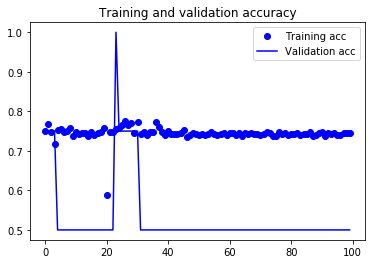

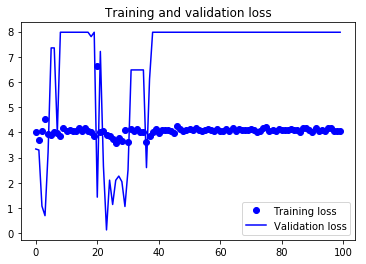

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Final Evaluation

Now use the test set to perform a final evaluation on your model of choice. 

In [11]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=20, 
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 208 images belonging to 2 classes.
test acc: 0.6271008395848154


## Summary

Well done! In this lab, you practice building your own CNN for image recognition which drastically outperformed our previous attempts using a standard deep learning model alone. In the upcoming sections, we'll continue to investigate further techniques associated with CNNs including visualizing the representations they learn and techniques to further bolster their performance when we have limited training data such as here.